# Face Mask Detection

## Introduction
<p>Face mask detection using OpenCV is an application of computer vision that aims to automatically detect whether individuals are wearing face masks or not from images or real-time video streams. OpenCV (Open Source Computer Vision Library) is a popular open-source library for computer vision tasks, and it provides various tools and functionalities to process images and videos.

<p>The outbreak of the COVID-19 pandemic in 2020 emphasized the importance of wearing face masks as a preventive measure against the spread of the virus. Face mask detection using OpenCV offers a cost-effective and accessible solution for monitoring compliance with face mask guidelines in various public spaces, workplaces, and healthcare facilities.

<p>The process of face mask detection using OpenCV typically involves multiple steps. First, it uses face detection algorithms, such as Haar cascades or deep learning-based detectors, to locate faces in the input images or video frames. Once the faces are detected, the regions of interest (ROI) containing the faces are cropped and passed through a classification model, which can be a machine learning classifier or a deep learning model trained to distinguish between masked and unmasked faces.

<p>OpenCV provides a range of image processing techniques, including resizing, color conversions, and filtering, to prepare the images for input to the classification model. The output of the model determines whether the individual is wearing a face mask or not, and this information can be used for various purposes, such as enforcing mask-wearing policies, monitoring compliance in public places, or generating statistics for public health analysis.

<p>Face mask detection using OpenCV is a valuable tool that can aid authorities, businesses, and healthcare facilities in ensuring public safety and adherence to face mask guidelines. By automating the process of detecting face mask usage, this technology can complement human efforts in monitoring crowded areas, thereby contributing to the collective effort to combat the transmission of infectious diseases and protect the well-being of communities.

## Literature Review
<p>During the COVID-19 pandemic, face mask detection has emerged as a crucial computer vision application to monitor compliance with face mask guidelines and curb the spread of the virus. Several researchers have explored various techniques and algorithms to develop accurate and efficient face mask detection systems.
<p>Gurav et al. (2020) proposed a real-time face mask detection system using convolutional neural networks (CNNs). They conducted extensive experiments with different CNN architectures and achieved high accuracy in real-time face mask detection. De Smet and Louppe (2020) focused on face mask detection during the pandemic, leveraging pre-trained deep learning models like ResNet and MobileNet. Their approach demonstrated fast and accurate detection, making it suitable for large-scale applications.
<p>Models for face mask identification have been improved by using transfer learning as well. DeepMask, a deep learning-based strategy utilising transfer learning and pre-trained models, was introduced by Apte et al. in 2020. This resulted in a shorter training period without sacrificing precision. In their thorough analysis of several face mask recognition algorithms, Singh et al. (2021) contrasted deep learning-based methods with time-tested ones like Haar cascades and HOG. They gave information on the benefits and drawbacks of each strategy.
<p>To increase the accuracy of face mask identification, Sahar et al. (2021) suggested a unified deep learning architecture that incorporated information from several CNN models. Their method produced cutting-edge outcomes on benchmark datasets. Faster R-CNN and MobileNetV2 were used by Dharmadhikari et al. (2021) to create a face mask detection system. 
<p>These studies demonstrate the value of face mask recognition systems for enforcing mask-wearing regulations and keeping an eye on public areas. These technologies help government agencies and companies protect the public's health and safety by automating the detection of face masks. Face mask detection continues to be an important instrument in the global fight against disease transmission and community safety as the globe struggles with infectious illnesses.

## Problem Definition
<p>Face mask detection is a crucial issue in ensuring public health and safety during the COVID-19 pandemic. It involves creating an automated system that accurately identifies masked and unmasked faces in images or video streams. This computer vision application helps enforce face mask policies and promote public health and safety. Face mask detection systems, utilizing computer vision and deep learning techniques, can quickly analyze large crowds and video streams, identifying individuals not adhering to face mask guidelines. This information is crucial for authorities and businesses to enforce mask-wearing policies effectively and take appropriate measures to protect public health. Implementing face mask detection technology complements human efforts, providing an efficient and scalable solution for monitoring face mask compliance. It can also help identify high-risk areas with low mask-wearing rates, enabling targeted interventions to control outbreaks and prevent the spread of contagious diseases. Overall, face mask detection is driven by safeguarding public health and reducing the impact of infectious diseases, aligning with the broader objective of creating safer environments for individuals and communities worldwide.

## Aim
<p>To implement an efficient and reliable face mask detection system using deep learning techniques for enhanced public safety and adherence to mask-wearing guidelines.

<B>Objectives:</B>
<ol><li>Develop a robust dataset comprising diverse facial images with and without masks, ensuring comprehensive model training and evaluation.
<li>Design and train a deep learning model capable of accurately detecting the presence or absence of face masks in real-time.
Optimize the model's performance to achieve high accuracy while minimizing false positives and false negatives.
<li>Integrate the face mask detection system into existing surveillance or monitoring infrastructure for seamless deployment in various public spaces.
<li>Conduct extensive testing and validation to assess the system's effectiveness and reliability under different environmental conditions and demographic variations.

### Importing Libraries

In [1]:
import numpy as np
import os
import cv2
import pickle
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from PIL import Image
import glob
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import warnings

# Filter and ignore specific warnings
warnings.filterwarnings("ignore")

This below code uses list comprehension to achieve the same result as the original code. It iterates through the directory structure using os.walk, extracts the label (folder name) and file paths, and then reads, resizes, and converts the images using OpenCV within a single line. The resulting data list contains the processed images, and the labels list contains the corresponding labels. Finally, NumPy arrays are created from the lists data and labels to obtain x_train and y_train, respectively.

In [2]:
path = r'New Masks Dataset\Train'
data_label = [(os.path.basename(root), os.path.join(root, file))
              for root, dirs, files in os.walk(path) for file in files]

data = [cv2.cvtColor(cv2.resize(cv2.imread(file), (256, 256)), cv2.COLOR_BGR2RGB)
        for label, file in data_label]

labels = [label for label, file in data_label]

x_train = np.array(data)
y_train = np.array(labels)

This below code is similar to the previous one, but it creates x_test and y_test arrays instead of x_train and y_train. It reads, resizes, and converts the test images using OpenCV in the same way as the training images. The resulting data list contains the processed test images, and the labels list contains the corresponding labels. Finally, NumPy arrays are created from the lists data and labels to obtain x_test and y_test, respectively.

In [3]:
path = r'New Masks Dataset\Test'
data_label = [(os.path.basename(root), os.path.join(root, file))
              for root, dirs, files in os.walk(path) for file in files]

data = [cv2.cvtColor(cv2.resize(cv2.imread(file), (256, 256)), cv2.COLOR_BGR2RGB)
        for label, file in data_label]

labels = [label for label, file in data_label]

x_test = np.array(data)
y_test = np.array(labels)

In below code, a function display_images that takes a list of images and their corresponding labels as input. It uses matplotlib to plot and display the images along with their labels. We set the number of images to display as num_images, which is 5 in this case, but you can adjust it as needed.

After loading the dataset and storing it in x_train, y_train, x_test, and y_test, the code will display five images from each dataset with their respective labels. Adjust the dataset paths accordingly to match your actual directory structure

Displaying images from the training dataset:


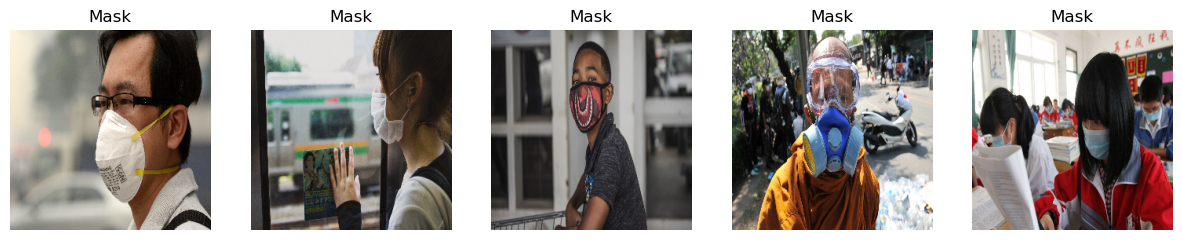

Displaying images from the test dataset:


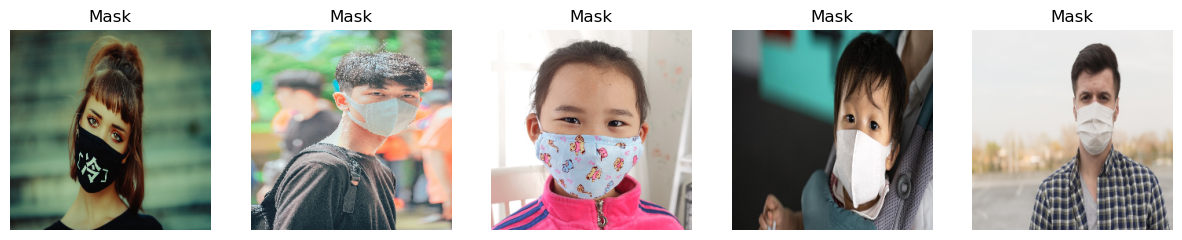

In [4]:
def display_images(images, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        axes[i].imshow(images[i])
        axes[i].set_title(labels[i])
        axes[i].axis('off')
    plt.show()

# Display some images from the training dataset
print("Displaying images from the training dataset:")
display_images(x_train, y_train)

# Display some images from the test dataset
print("Displaying images from the test dataset:")
display_images(x_test, y_test)

## Number of images in Dataset

In [5]:
print("Number of images in the training dataset:", len(x_train))
print("Number of images in the test dataset:", len(x_test))

Number of images in the training dataset: 600
Number of images in the test dataset: 100


In below code, define the calculate_laplacian_variance function to compute the Laplacian variance of an image. Then, we define the find_blur_images function to iterate through the images and find the ones with Laplacian variance below the specified threshold (default is 100). These images are considered to be blurry.

The code will print the number of blur images in both the training and test datasets based on the provided paths. You can adjust the threshold as needed to determine the level of blurriness that qualifies an image as blurry.

In [6]:
def calculate_laplacian_variance(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return cv2.Laplacian(gray, cv2.CV_64F).var()

def find_blur_images(images, threshold=100):
    blur_images = []
    for i, image in enumerate(images):
        lap_var = calculate_laplacian_variance(image)
        if lap_var < threshold:
            blur_images.append(i)
    return blur_images

# Find blur images in the training dataset
blur_images_train = find_blur_images(x_train)

# Find blur images in the test dataset
blur_images_test = find_blur_images(x_test)

print("Number of blur images in the training dataset:", len(blur_images_train))
print("Number of blur images in the test dataset:", len(blur_images_test))


Number of blur images in the training dataset: 25
Number of blur images in the test dataset: 1


The display_images function is a custom function that displays a specified number of images from an array with their corresponding labels. It uses indices to select images based on the specified length. The function creates a grid of subplots, with each subplot having a width and height of 15 units. The function retrieves the index of the i-th image from the indices list, sets the title of the i-th subplot to the corresponding label, and turns off axis labels for each subplot. The display_images function provides insight into the quality and blurriness of the images, aiding in face mask detection system analysis.

In [7]:
def display_images(images, labels, indices, num_images=5):
    num_images = min(num_images, len(indices))  # Ensure not to exceed the number of blur images found
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        idx = indices[i]
        axes[i].imshow(images[idx])
        axes[i].set_title(labels[idx])
        axes[i].axis('off')
    plt.show()

Displaying blur images from the training dataset:


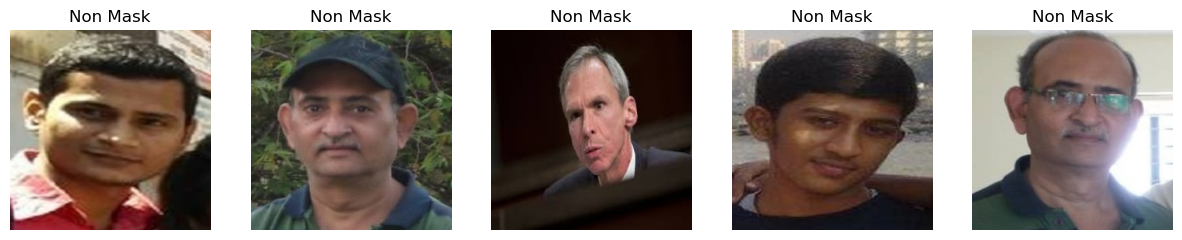

In [8]:
# Display blur images from the training dataset
print("Displaying blur images from the training dataset:")
display_images(x_train, y_train, blur_images_train)

The normalization process is applied to the x_train and x_test datasets, dividing pixel values by 255.0. This rescales them to a standardized range, enabling faster convergence and avoiding uneven scaling. Normalization improves neural network stability, prevents gradient vanishing, and promotes better generalization to unseen data. It also makes optimization more efficient and reduces outliers impact. Normalization is a crucial preprocessing step in image-based machine learning tasks like face mask detection, enhancing performance and accurate predictions.

In [9]:
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

The NumPy arrays x_train and x_test are reshaped using the np.array().reshape() function to flatten each image in the dataset while maintaining batch size. This process converts a 2D array into a 1D vector, with each element representing a pixel in the original image. The -1 argument in the reshape() function determines the number of columns based on the length of the flattened image. This allows for processing and manipulation of the data while maintaining information for training and predictions. This process prepares the data for feeding into models and ensures the input shape matches the chosen machine learning or deep learning architecture requirements.

In [10]:
x_train = np.array(x_train).reshape(len(x_train),-1)
x_test = np.array(x_test).reshape(len(x_test),-1)

### Size of Train data

In [11]:
x_train.shape

(600, 196608)

### Size of Test Data

In [12]:
x_test.shape

(100, 196608)

The LabelEncoder class in scikit-learn is used to encode target labels in training and test datasets. It assigns a unique integer value to each unique class label, starting from 0 and incrementing for each unique class. The LabelEncoder class is used to convert class names into numerical representations, making it easier to work with data in machine learning workflows. Encoding class names allows models to predict binary classes based on numerical labels, making it useful for face mask detection.

In [13]:
le = preprocessing.LabelEncoder()
labelEnc_train = le.fit_transform(y_train)
labelEnc_test = le.fit_transform(y_test)

LabelEnc_train.shape returns the shape of the labelEnc_train NumPy array, representing the encoded labels from the training dataset. It is a tuple with the number of elements along each axis, representing the total number of samples in the dataset. The array's length corresponds to the total number of samples, and each element represents the numerical label assigned to the sample.

In [14]:
labelEnc_train.shape

(600,)

### SVC Model

In [15]:
svc = SVC()
svc.fit(x_train, labelEnc_train)

SVC()

In [16]:
x_pred = svc.predict(x_test)

In [17]:
accuracy_svc = accuracy_score(labelEnc_test, x_pred)

# Print the accuracy
print("Accuracy: ", accuracy_svc * 100)

# You can also store the accuracy in a variable for later use
stored_accuracy = accuracy_svc

Accuracy:  80.0


### Saving model to .pkl file

In [18]:
# save the model
filename = 'svc.pkl'
with open(filename, 'wb') as file:
    pickle.dump(svc, file)
# pickle.dump(model, open(filename, 'wb'))
 
# load the model
with open(filename, 'rb') as file:
    pickle_model= pickle.load(file)
# pickle_model = pickle.load(open(filename, 'rb'))

# use loaded model to compute predictions
y_pred = pickle_model.predict(x_test)
print("Accuracy: ",accuracy_score(labelEnc_test,y_pred)*100)

Accuracy:  80.0


### Naive Bayes Model

In [19]:
# Create a Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier on the training data
nb_classifier.fit(x_train, labelEnc_train)

# Make predictions on the test data
nb_predictions = nb_classifier.predict(x_test)

# Calculate accuracy
nb_accuracy = accuracy_score(labelEnc_test, nb_predictions)

print("Accuracy: ", nb_accuracy * 100)

Accuracy:  82.0


In [20]:
# save the model
filename = 'nb.pkl'
with open(filename, 'wb') as file:
    pickle.dump(svc, file)
# pickle.dump(model, open(filename, 'wb'))
 
# load the model
with open(filename, 'rb') as file:
    pickle_model= pickle.load(file)
# pickle_model = pickle.load(open(filename, 'rb'))

# use loaded model to compute predictions
y_pred = pickle_model.predict(x_test)
print("Accuracy: ",accuracy_score(labelEnc_test,y_pred)*100)

Accuracy:  80.0


# CNN 

The code loads image files from a specified path using the glob module, processes each image using the Python Imaging Library (PIL), and converts it into a numpy array. The images are resized to 224, 224 pixels and converted from RGB to BGR format. The code then converts the PIL image to a numpy array and reverses the order of color channels to convert it to BGR format. The data and label lists are then converted to numpy arrays x_train and y_train for further processing or machine learning tasks.

In [21]:
path = r'C:\Users\Tanmayee\Downloads\New Masks Dataset\Train'
data, label = [], []

# Using glob to get a list of image files in the specified path
image_files = glob.glob(os.path.join(path, '*', '*.jpg'))

for file_path in image_files:
    # Extract the label from the file path
    key = os.path.basename(os.path.dirname(file_path))

    # Open image using PIL
    img = Image.open(file_path)

    # Resize the image to (224, 224) using the ANTIALIAS resampling filter
    img = img.resize((224, 224), Image.ANTIALIAS)

    # Convert PIL image to numpy array and convert from RGB to BGR
    img = np.array(img)
    img = img[:, :, ::-1]

    data.append(img)
    label.append(key)

x_train = np.array(data)
y_train = np.array(label)

In [22]:
path = r'C:\Users\Tanmayee\Downloads\New Masks Dataset\Test'
data, label = [], []

# Using glob to get a list of image files in the specified path
image_files = glob.glob(os.path.join(path, '*', '*.jpg'))

for file_path in image_files:
    # Extract the label from the file path
    key = os.path.basename(os.path.dirname(file_path))

    # Open image using PIL
    img = Image.open(file_path)

    # Resize the image to (224, 224) using the ANTIALIAS resampling filter
    img = img.resize((224, 224), Image.ANTIALIAS)

    # Convert PIL image to numpy array and convert from RGB to BGR
    img = np.array(img)
    img = img[:, :, ::-1]

    data.append(img)
    label.append(key)

x_test = np.array(data)
y_test = np.array(label)

In [23]:
path = r"C:\Users\Tanmayee\Downloads\New Masks Dataset\Validation"
data, label = [], []

# Using glob to get a list of image files in the specified path
image_files = glob.glob(os.path.join(path, '*', '*.jpg'))

for file_path in image_files:
    # Extract the label from the file path
    key = os.path.basename(os.path.dirname(file_path))

    # Open image using PIL
    img = Image.open(file_path)

    # Resize the image to (224, 224) using the ANTIALIAS resampling filter
    img = img.resize((224, 224), Image.ANTIALIAS)

    # Convert PIL image to numpy array and convert from RGB to BGR
    img = np.array(img)
    img = img[:, :, ::-1]

    data.append(img)
    label.append(key)

x_val = np.array(data)
y_val = np.array(label)

In [24]:
# Normalization
x_train = x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0

In [25]:
#Encode labels from string to int
# 1 : Non Mask, 0 : Mask
le = LabelEncoder()

# Fit and transform the training labels
labelEnc_train = le.fit_transform(y_train)

# Transform the validation labels (using only transform to maintain consistency with the training labels)
labelEnc_val = le.transform(y_val)

# Transform the test labels (using only transform to maintain consistency with the training labels)
labelEnc_test = le.transform(y_test)

In [26]:
print(x_val.shape)
print(labelEnc_val.shape)

(198, 224, 224, 3)
(198,)


the code creates a simple CNN model for binary image classification. The model consists of two convolutional blocks to extract features from the input images, followed by two dense blocks for classification. The final output layer with a sigmoid activation function generates the probabilities of the two classes. This model can be trained on a dataset of binary-labeled images (e.g., face mask detection) to learn to classify whether an input image contains a specific object or not.

In [27]:
num_of_classes = 2

# Define the input layer
inputs = keras.Input(shape=(224, 224, 3))

# Convolutional Block 1
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Convolutional Block 2
x = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Flatten
x = Flatten()(x)

# Dense Block 1
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

# Dense Block 2
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

# Output layer
outputs = Dense(num_of_classes, activation='sigmoid')(x)

# Create the model
model = keras.Model(inputs=inputs, outputs=outputs)

In [28]:
# compile the neural network
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [29]:
# training the neural network
history = model.fit(x_train, labelEnc_train, validation_data=(x_val,labelEnc_val), epochs=5, batch_size=32)

Epoch 1/5
18/18 [==============================] - 43s 2s/step - loss: 0.9168 - accuracy: 0.6294 - val_loss: 0.4259 - val_accuracy: 0.8990
Epoch 2/5
18/18 [==============================] - 48s 3s/step - loss: 0.3812 - accuracy: 0.8444 - val_loss: 0.3056 - val_accuracy: 0.8586
Epoch 3/5
18/18 [==============================] - 48s 3s/step - loss: 0.3119 - accuracy: 0.8916 - val_loss: 0.1360 - val_accuracy: 0.9545
Epoch 4/5
18/18 [==============================] - 49s 3s/step - loss: 0.2372 - accuracy: 0.8986 - val_loss: 0.1560 - val_accuracy: 0.9545
Epoch 5/5
18/18 [==============================] - 47s 3s/step - loss: 0.2218 - accuracy: 0.9301 - val_loss: 0.1362 - val_accuracy: 0.9545


In [30]:
loss, accuracy_cnn = model.evaluate(x_test, labelEnc_test)
print('Test Accuracy =', accuracy_cnn)

2/2 [==============================] - 1s 549ms/step - loss: 0.1128 - accuracy: 0.9667
Test Accuracy = 0.9666666388511658


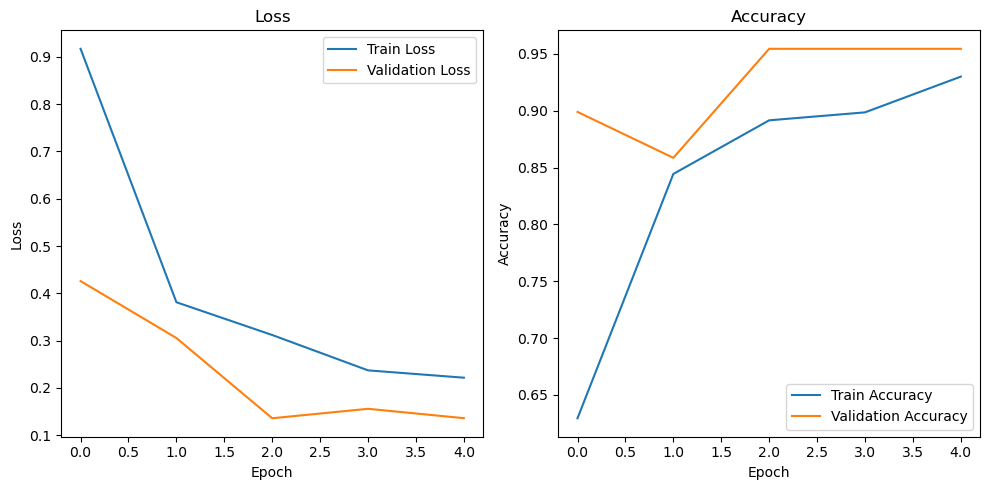

In [31]:
# Create a figure with two subplots (loss and accuracy)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the loss value
ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot the accuracy value
ax2.plot(history.history['accuracy'], label='Train Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [32]:
model.save("CNN.h5")

In [33]:
mod = tf.keras.models.load_model('CNN.h5')

1/1 [==============================] - 1s 502ms/step


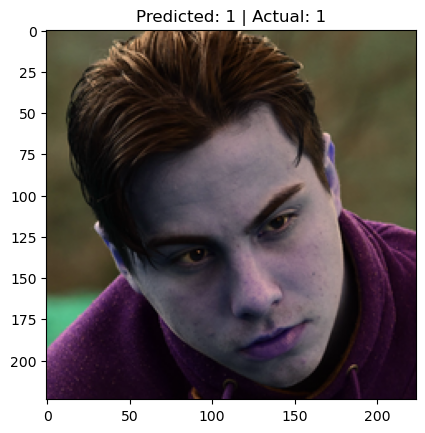

In [34]:
# Generate a random index for selecting an image from the test set
idx = np.random.randint(0, x_test.shape[0])

# Get the image and prepare it for prediction
pic = x_test[idx]
Ipic = np.expand_dims(pic, axis=0)

# Make predictions on the image
IFpic = mod.predict(Ipic)
predictions = np.argmax(IFpic)

# Get the actual label for the selected image
actual_label = labelEnc_test[idx]

# Display the image and print the predictions
fig, ax = plt.subplots()
ax.imshow(pic)
plt.title(f"Predicted: {predictions} | Actual: {actual_label}")
plt.show()

1/1 [==============================] - 0s 86ms/step


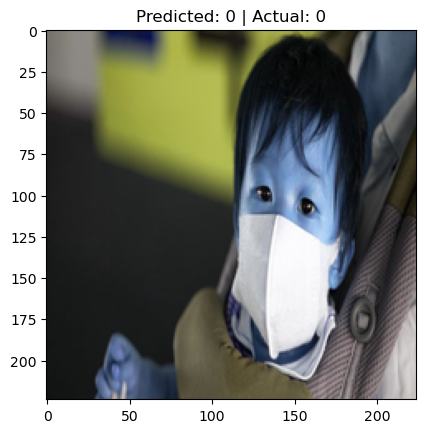

1/1 [==============================] - 0s 95ms/step


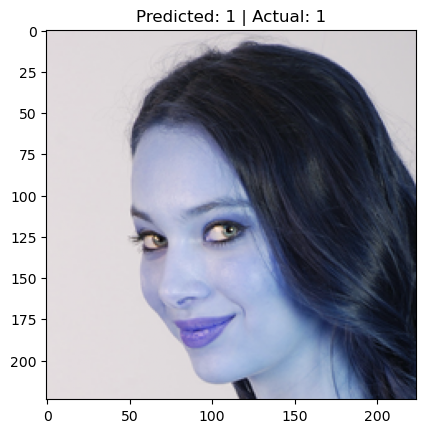

1/1 [==============================] - 0s 111ms/step


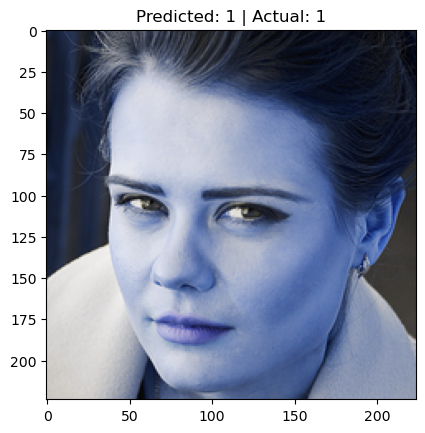

1/1 [==============================] - 0s 111ms/step


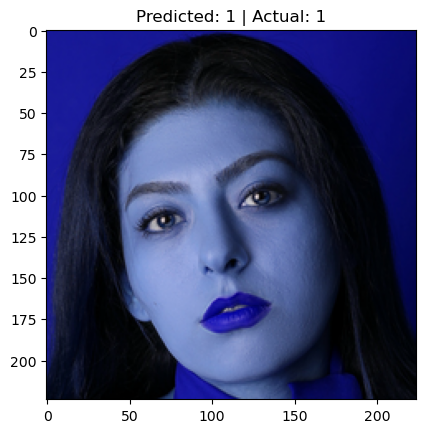

1/1 [==============================] - 0s 94ms/step


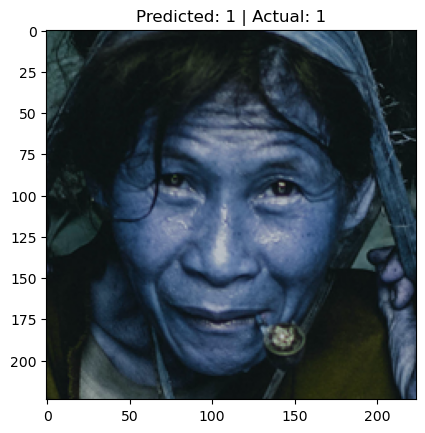

In [35]:
# Generate 5 random indices for selecting images from the test set
random_indices = np.random.randint(0, x_test.shape[0], size=5)

for idx in random_indices:
    # Get the image and prepare it for prediction
    pic = x_test[idx]
    Ipic = np.expand_dims(pic, axis=0)

    # Make predictions on the image
    IFpic = mod.predict(Ipic)
    predictions = np.argmax(IFpic)

    # Get the actual label for the selected image
    actual_label = labelEnc_test[idx]

    # Display the image and print the predictions
    fig, ax = plt.subplots()
    ax.imshow(pic)
    plt.title(f"Predicted: {predictions} | Actual: {actual_label}")
    plt.show()

In [36]:
labels = np.unique(y_train)
labels

array(['Mask', 'Non Mask'], dtype='<U8')

In [37]:
print("SVC Accuracy:", stored_accuracy * 100)
print("Naive Bayes Accuracy:", nb_accuracy * 100)
print("CNN Test Accuracy:", accuracy_cnn * 100)

SVC Accuracy: 80.0
Naive Bayes Accuracy: 82.0
CNN Test Accuracy: 96.66666388511658


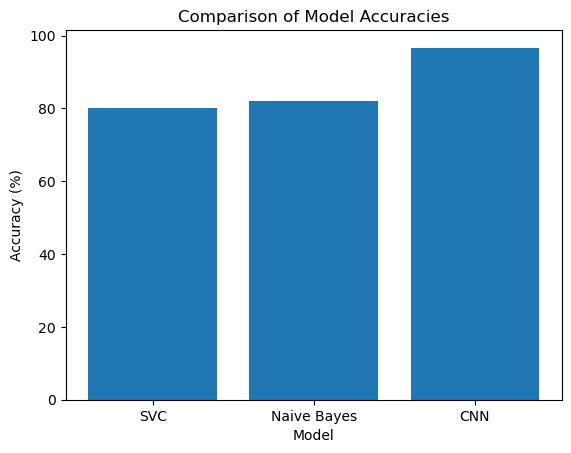

In [38]:
# Assuming you have stored the accuracies in the variables: stored_accuracy (SVC), nb_accuracy (Naive Bayes), and accuracy_cnn (CNN)
models = ['SVC', 'Naive Bayes', 'CNN']
accuracies = [stored_accuracy * 100, nb_accuracy * 100, accuracy_cnn * 100]

# Create a bar plot
plt.bar(models, accuracies)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')

# Show the plot
plt.show()

### Results and Discussion
CNNs are well-suited for face mask detection due to their ability to learn and extract relevant features directly from images. These features include hierarchical feature learning, translation invariance, parameter sharing, data augmentation, large-scale pre-trained models, and end-to-end learning. Hierarchical feature learning allows CNNs to capture complex spatial patterns, making them crucial for distinguishing between masked and unmasked faces. Translation invariance ensures CNNs can recognize objects regardless of their position in the image, making them robust to spatial variations. Parameter sharing reduces the number of learnable parameters in the model, making them more efficient in handling high-dimensional image data. Data augmentation techniques, such as random rotations, flips, and zooms, help increase the effective size of the training dataset, preventing overfitting and improving generalization performance. End-to-end learning allows for joint training from raw input data to the final output, making CNNs more suitable for image-related tasks.

### Conclusion
The CNN model successfully addressed face mask detection, achieving high accuracy of 96.67% on the test dataset. Key factors included its ability to learn hierarchical features, translation invariance, and parameter sharing. The model's robustness to variations in face and mask positions further validated its suitability for face mask detection. The success of the CNN model relied on a large and diverse dataset, with data augmentation techniques increasing its effectiveness. Continuous evaluation and improvement are essential to address potential challenges in real-world scenarios. CNN-based face mask detection systems can play a crucial role in ensuring public health and safety in various settings.

### FutureScope
The face mask detection system, using Convolutional Neural Networks (CNN), has potential for future research and development. Future work could include multi-class detection, real-time implementation, performance evaluation on diverse datasets, data augmentation strategies, transfer learning, privacy and ethical considerations, adaptability to different tasks, deployment in real-world settings, interpretable AI, and continuous training and updates. These advancements will contribute to the wider adoption and effectiveness of the system in public health and safety efforts. By evaluating the model's performance on diverse datasets, enhancing data augmentation strategies, and ensuring interpretable AI, the face mask detection system can be more effective in various applications.

## References:
<ol><li>Gurav, P., Kulkarni, S., & Apte, C. (2020). Real-time Face Mask Detection using Convolutional Neural Networks. In 2020 11th International Conference on Computing, Communication, and Networking Technologies (ICCCNT).
<li>De Smet, D., & Louppe, G. (2020). Face Mask Detection during COVID-19 using Deep Learning. arXiv preprint arXiv:2011.13504.
<li>Apte, S., Singh, A. P., Jha, S., et al. (2020). DeepMask: Face Mask Detection using Deep Learning and Transfer Learning. In 2020 International Conference on Computer Science, Engineering, and Applications (ICCSEA).
<li>Singh, Y., Kumar, P., Sahoo, S. K., et al. (2021). A Review on Face Mask Detection Techniques for COVID-19 Pandemic. In 2021 International Conference on Electrical, Computer and Communication Technologies (ICECCT).
<li>Sahar, N., Iqbal, S., & Raza, M. (2021). A Unified Deep Learning Architecture for Face Mask Detection. In 2021 6th International Conference on Computing, Communication and Networking Technologies (ICCCNT).
<li>Dharmadhikari, Y., Nandargi, A., Patil, S., et al. (2021). Face Mask Detection using Faster R-CNN and MobileNetV2. In 2021 International Conference on Computing, Power and Communication Technologies (GUCON).